In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   



In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\shiha\Downloads\cardio_train (1).csv", sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Notice that age is in days format, so we are converting those in years format.

In [3]:
# Convert age from days to years and round to nearest integer
df['age_years'] = (df['age'] / 365).round()


In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


## Now Lets create a BMI index which might come in handy later.

In [6]:
# Calculate BMI and add as a new column
df['BMI'] = df['weight'] / ( (df['height'] / 100) ** 2 )
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


## Lets add another column which will categorize the BMI index value. This way we can understand clearly where a person stands physical aspect wise.

In [7]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)


In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,Normal
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,Obese
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,Normal
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,Normal


## We need to convert the BMI category into numbers like 1, 2, 3 , 4 etc. This way it's easier for the model to train effectively because some ML model works better on numeric encoding.

In [9]:
bmi_map = {
    'Underweight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4
}


In [13]:
df['BMI_category_num'] = df['BMI_category'].map(bmi_map)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,Normal,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,Obese,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,Normal,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,Overweight,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,Normal,2


## Now Lets focus on cleaning the dataset, this is crucial for the future steps in our project.

### Starting off with seeing if there is any missing values or not.

In [14]:
df.isnull().sum()

id                  0
age                 0
gender              0
height              0
weight              0
ap_hi               0
ap_lo               0
cholesterol         0
gluc                0
smoke               0
alco                0
active              0
cardio              0
age_years           0
BMI                 0
BMI_category        0
BMI_category_num    0
dtype: int64

## Looks like there isn't any missing values, but we still need to look out for abnormal values or outliers which will harm our model's accuracy.

In [12]:
df_clean = df.copy() # Create a copy to preserve the original data
df_clean.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,Normal,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,Obese,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,Normal,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,Overweight,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,Normal,2


### Lets look at age

Reference: World Health Organization (WHO). "Adolescent health." Defines adulthood starting from 18 years.

Rationale: We exclude <18 (children) and >100 (extreme outliers).

In [15]:


# --- AGE CLEANING ---
print("Min age:", df_clean['age_years'].min())
print("Max age:", df_clean['age_years'].max())

# Count abnormal ages
abnormal_age = df_clean[(df_clean['age_years'] < 18) | (df_clean['age_years'] > 100)]
print("Abnormal ages found:", abnormal_age.shape[0])

# Drop them
df_clean = df_clean[(df_clean['age_years'] >= 18) & (df_clean['age_years'] <= 100)]
print("Remaining rows after age cleaning:", df_clean.shape[0])


Min age: 30.0
Max age: 65.0
Abnormal ages found: 0
Remaining rows after age cleaning: 70000


## Lets look at the height now.

Reference: Centers for Disease Control and Prevention (CDC), Anthropometric Reference Data for U.S. Adults, 2015–2018.

Adult height typically ranges ~140–200 cm, but rare cases can extend beyond.

Rationale: We used 80–250 cm as a broad but realistic filter to exclude data entry errors.





In [16]:
# --- HEIGHT CLEANING (80–250 cm) ---
print("Min height:", df_clean['height'].min())
print("Max height:", df_clean['height'].max())

# Count abnormal heights
abnormal_height = df_clean[(df_clean['height'] < 80) | (df_clean['height'] > 250)]
print("Abnormal heights found:", abnormal_height.shape[0])

# Drop them
df_clean = df_clean[(df_clean['height'] >= 80) & (df_clean['height'] <= 250)]
print("Remaining rows after height cleaning:", df_clean.shape[0])


Min height: 55
Max height: 250
Abnormal heights found: 22
Remaining rows after height cleaning: 69978


## Lets look at weight now.

Reference: CDC Anthropometric Reference Data 2015–2018.

Adult weight distribution: ~45–120 kg for most adults, but can extend higher.

Rationale: We set 40–200 kg as plausible to allow for heavier individuals while filtering errors.

In [17]:

print("Min weight:", df_clean['weight'].min())
print("Max weight:", df_clean['weight'].max())

# Count abnormal weights
abnormal_weight = df_clean[(df_clean['weight'] < 40) | (df_clean['weight'] > 200)]
print("Abnormal weights found:", abnormal_weight.shape[0])

# Drop them
df_clean = df_clean[(df_clean['weight'] >= 40) & (df_clean['weight'] <= 200)]
print("Remaining rows after weight cleaning:", df_clean.shape[0])


Min weight: 10.0
Max weight: 200.0
Abnormal weights found: 52
Remaining rows after weight cleaning: 69926


## Lets look at blood pressure

Reference: American Heart Association (AHA) – 2017 Guidelines.

Physiological bounds: 60–240 systolic (ap_hi), 40–130 diastolic (ap_lo).

In [18]:
#inspecting systolic between 200 and 300
df_clean[(df_clean['ap_hi'] > 200) & (df_clean['ap_hi'] < 300)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
1328,1863,21063,2,174,106.0,220,120,3,3,0,0,1,0,58.0,35.011230,Obese,4
2142,3026,15384,2,174,113.0,210,1100,1,1,0,0,1,1,42.0,37.323292,Obese,4
2278,3208,22636,1,156,101.0,220,110,1,2,0,0,0,1,62.0,41.502301,Obese,4
4981,7054,22722,2,173,74.0,220,160,2,2,0,0,1,1,62.0,24.725183,Normal,2
8919,12717,19088,2,176,61.0,210,110,1,1,0,0,1,1,52.0,19.692665,Normal,2
10386,14825,21223,1,167,113.0,220,120,3,1,0,0,1,1,58.0,40.517767,Obese,4
11269,16123,18872,1,161,70.0,210,120,1,1,0,0,1,1,52.0,27.005131,Overweight,3
11384,16282,23117,2,169,101.0,210,100,2,1,0,0,1,1,63.0,35.362907,Obese,4
12129,17320,20606,1,166,68.0,210,100,1,1,0,0,1,0,56.0,24.677021,Normal,2
14805,21162,19740,1,157,92.0,210,120,1,1,0,0,1,1,54.0,37.324029,Obese,4


In [19]:
# Show rows where systolic blood pressure (ap_hi) is greater than 200
high_ap_hi = df_clean[df_clean['ap_hi'] > 200]
print(f"Number of records with ap_hi > 200: {len(high_ap_hi)}")
display(high_ap_hi)


Number of records with ap_hi > 200: 100


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
1328,1863,21063,2,174,106.0,220,120,3,3,0,0,1,0,58.0,35.011230,Obese,4
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0,41.0,23.437500,Normal,2
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0,62.0,21.155294,Normal,2
2142,3026,15384,2,174,113.0,210,1100,1,1,0,0,1,1,42.0,37.323292,Obese,4
2278,3208,22636,1,156,101.0,220,110,1,2,0,0,0,1,62.0,41.502301,Obese,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67710,96686,19687,2,168,75.0,240,140,3,1,0,0,1,1,54.0,26.573129,Overweight,3
68579,97963,19769,2,171,71.0,220,110,2,1,0,0,1,1,54.0,24.280975,Normal,2
68663,98095,18190,1,156,41.0,906,0,1,1,0,0,1,0,50.0,16.847469,Underweight,1
69329,99019,19818,1,145,62.0,240,130,1,1,0,0,0,1,54.0,29.488704,Overweight,3


In [20]:
# Show rows where systolic blood pressure (ap_hi) is less than 0
low_ap_hi = df_clean[df_clean['ap_hi'] < 0]
print(f"Number of records with ap_hi < 0: {len(low_ap_hi)}")
display(low_ap_hi)


Number of records with ap_hi < 0: 7


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0,42.0,28.650138,Overweight,3
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0,61.0,34.720883,Obese,4
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0,43.0,23.068051,Normal,2
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1,50.0,28.196921,Overweight,3
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1,40.0,17.715420,Underweight,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1,64.0,20.904195,Normal,2
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0,65.0,23.046875,Normal,2


In [21]:
# Show rows where diastolic blood pressure (ap_lo) is less than 0
low_ap_lo = df_clean[df_clean['ap_lo'] < 0]
print(f"Number of records with ap_lo < 0: {len(low_ap_lo)}")
display(low_ap_lo)




Number of records with ap_lo < 0: 1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1,62.0,26.533759,Overweight,3


In [22]:
# Show rows where diastolic blood pressure (ap_lo) is greater than 200
high_ap_lo = df_clean[df_clean['ap_lo'] > 200]
print(f"Number of records with ap_lo > 200: {len(high_ap_lo)}")
display(high_ap_lo)

Number of records with ap_lo > 200: 950


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,48.0,29.263340,Overweight,3
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,60.0,24.341758,Normal,2
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,50.0,36.888889,Obese,4
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,64.0,20.338326,Normal,2
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,51.0,34.154158,Obese,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1,64.0,29.043709,Overweight,3
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1,60.0,24.238227,Normal,2
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1,58.0,33.659297,Obese,4
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0,61.0,28.305995,Overweight,3


In [23]:
# (SBP: 60-240, DBP: 40-130)
# Defining plausible limits
MIN_SYSTOLIC  = 60
MAX_SYSTOLIC  = 240
MIN_DIASTOLIC = 40
MAX_DIASTOLIC = 130


In [24]:
# CORRECT THE COMMON DATA ENTRY ERROR: Missing decimal in Diastolic
# We assume any diastolic value between 400 and 1300 with trailing '00' is meant to be divided by 10.
suspicious_dia_range = (400, 1300)

dia_error_mask = (
    (df_clean['ap_lo'] >= suspicious_dia_range[0]) &
    (df_clean['ap_lo'] <= suspicious_dia_range[1]) &
    (df_clean['ap_lo'] % 100 == 0)
)

before_corr = df_clean['ap_lo'].copy()
df_clean.loc[dia_error_mask, 'ap_lo'] = df_clean.loc[dia_error_mask, 'ap_lo'] / 10
print(f"Corrected {dia_error_mask.sum()} diastolic values by dividing by 10.")


Corrected 848 diastolic values by dividing by 10.


In [25]:
# Create a boolean mask for rows that are within limits
valid_data_mask = (
    (df_clean['ap_hi'] >= MIN_SYSTOLIC)  &
    (df_clean['ap_hi'] <= MAX_SYSTOLIC)  &
    (df_clean['ap_lo'] >= MIN_DIASTOLIC) &
    (df_clean['ap_lo'] <= MAX_DIASTOLIC)
)


In [26]:
# Apply the mask to get your cleaned dataset (overwrite df_clean as requested)
before_rows = df_clean.shape[0]
df_clean = df_clean[valid_data_mask].copy()
after_rows = df_clean.shape[0]

print(f"Rows kept after BP bounds: {after_rows} (dropped {before_rows - after_rows})")
display(df_clean.describe())


Rows kept after BP bounds: 69495 (dropped 431)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000,69495.000000
mean,49977.324484,19468.921764,1.349579,164.396302,74.229919,126.973394,81.581337,1.367005,1.226232,0.088294,0.053601,0.803597,0.499187,53.338873,27.522183
std,28856.459732,2467.212985,0.476840,8.013984,14.352589,16.989963,9.680532,0.680492,0.572124,0.283724,0.225230,0.397279,0.500003,6.765133,5.543814
min,0.000000,10798.000000,1.000000,80.000000,40.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,13.520822
25%,24999.000000,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50005.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.395803
75%,74901.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.189591
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,278.125000


## Lets look at BMI

Reference: World Health Organization (WHO) BMI classification.

Rationale: Plausible BMI for adults is generally 10–60. Values outside are considered unrealistic or erroneous.

In [27]:
print("Min BMI:", df_clean['BMI'].min())
print("Max BMI:", df_clean['BMI'].max())

# Count abnormal BMI
abnormal_bmi = df_clean[(df_clean['BMI'] < 10) | (df_clean['BMI'] > 60)]
print("Abnormal BMI values found:", abnormal_bmi.shape[0])


Min BMI: 13.520822065981614
Max BMI: 278.12499999999994
Abnormal BMI values found: 44


In [28]:
# Count rows before cleaning
before_rows = df_clean.shape[0]

# Drop abnormal BMI rows (<10 or >60)
df_clean = df_clean[(df_clean['BMI'] >= 10) & (df_clean['BMI'] <= 60)].copy()

# Count rows after cleaning
after_rows = df_clean.shape[0]

print(f"Rows kept after BMI cleaning: {after_rows} (dropped {before_rows - after_rows})")


Rows kept after BMI cleaning: 69451 (dropped 44)


## we have done the most part of the cleaning, we just need to see if there's any duplicate values or not. 

In [29]:
# Count duplicate rows in the cleaned dataframe
duplicate_rows = df_clean.duplicated().sum()
print("Duplicate rows found:", duplicate_rows)


Duplicate rows found: 0


In [30]:
df_clean.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,BMI_category_num
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,Normal,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,Obese,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,Normal,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,Overweight,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,Normal,2


## Lets scale our data for the better readabilty and also our model need it so that it can train effectively

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Drop BMI_category and age (in days)
df_to_scale = df_clean.drop(columns=['BMI_category', 'age'])

# Scale all remaining features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_to_scale)

# Put back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_to_scale.columns, index=df_to_scale.index)

print("Scaled dataframe shape:", df_scaled.shape)
display(df_scaled)


Scaled dataframe shape: (69451, 15)


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
0,0.00000,1.0,0.453333,0.13750,0.277778,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.571429,0.181722,0.333333
1,0.00001,0.0,0.373333,0.28125,0.444444,0.555556,1.0,0.0,0.0,0.0,1.0,1.0,0.714286,0.460569,1.000000
2,0.00002,0.0,0.433333,0.15000,0.388889,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.628571,0.214870,0.333333
3,0.00003,1.0,0.460000,0.26250,0.500000,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.514286,0.326806,0.666667
4,0.00004,0.0,0.373333,0.10000,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.514286,0.204185,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.99994,1.0,0.453333,0.22500,0.333333,0.444444,0.0,0.0,1.0,0.0,1.0,0.0,0.657143,0.288443,0.666667
69996,0.99996,0.0,0.386667,0.53750,0.444444,0.555556,0.5,0.5,0.0,0.0,1.0,1.0,0.914286,0.795020,1.000000
69997,0.99997,1.0,0.553333,0.40625,0.666667,0.555556,1.0,0.0,0.0,1.0,0.0,1.0,0.628571,0.383672,1.000000
69998,0.99999,0.0,0.420000,0.20000,0.416667,0.444444,0.0,0.5,0.0,0.0,0.0,1.0,0.885714,0.292140,0.666667


In [33]:
# Correlation matrix on the scaled dataframe
corr_matrix = df_scaled.corr()

# Correlation with target 'cardio'
target_corr = corr_matrix['cardio'].sort_values(ascending=False)
print(target_corr)


cardio              1.000000
ap_hi               0.430829
ap_lo               0.345124
age_years           0.238128
cholesterol         0.221154
BMI                 0.192569
BMI_category_num    0.184819
weight              0.182205
gluc                0.088991
gender              0.007627
id                  0.004004
alco               -0.008032
height             -0.013035
smoke              -0.015553
active             -0.036325
Name: cardio, dtype: float64


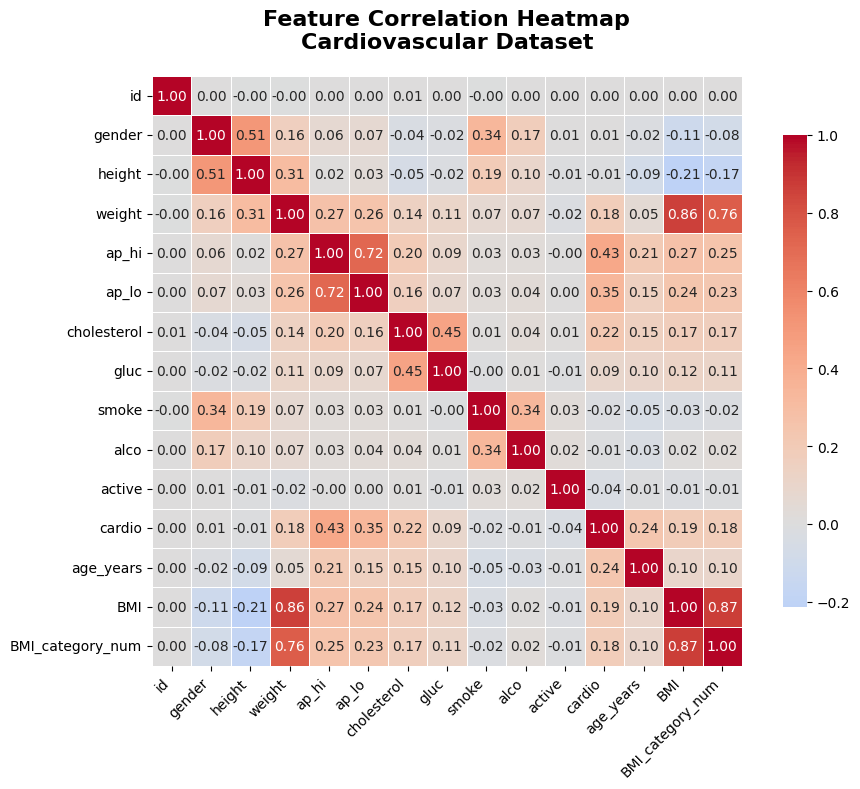

In [43]:
# HEATMAP VISUALIZATION



# Set up the figure
plt.figure(figsize=(10, 8))

# Create the heatmap
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    cmap='coolwarm',      # Color scheme (blue-white-red)
    center=0,             # Center colormap at 0
    fmt='.2f',            # Format numbers to 2 decimal places
    linewidths=0.5,       # Add lines between cells
    square=True,          # Make cells square
    cbar_kws={"shrink": 0.8}  # Size of color bar
)

# Customize titles and labels
plt.title('Feature Correlation Heatmap\nCardiovascular Dataset',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

# Feature Selection: 

Let's look at the reasoning behind which features are included in the training dataset and which are excluded. The decision is based on both the correlation with the target variable (`cardio`) and the clinical relevance of each feature.

---

## Included Features

1. ap_hi (Systolic BP), Corr = 0.43  
  Strongest correlation with `cardio`. Hypertension is a major cardiovascular risk factor.  

2. ap_lo (Diastolic BP), Corr = 0.35  
  Second-strongest correlation. Clinically important for identifying blood pressure issues.  

3. age_years, Corr = 0.24  
  Age is strongly linked to CVD risk; both data and medical evidence support this.  

4. cholesterol, Corr = 0.22  
  Cholesterol is a well-established clinical factor; moderate correlation in data.  

5. BMI, Corr = 0.19  
  Captures weight and height together, more informative than either alone. Known risk factor for obesity-related CVD.  

6. gluc, Corr = 0.09  
  Elevated glucose levels (diabetes) are linked to cardiovascular disease.  









## Lets select the features and do the train test split.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define core feature set
core_features = ['ap_hi', 'ap_lo', 'age_years', 'cholesterol', 'BMI', 'gluc']

# Split into X (features) and y (target)
X = df_scaled[core_features]
y = df_scaled['cardio']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=None,    # let trees expand fully
    random_state=42,
    n_jobs=-1
)

In [46]:
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred = rf_model.predict(X_test)

In [48]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6772010654380534

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.67      0.68      6957
         1.0       0.68      0.68      0.68      6934

    accuracy                           0.68     13891
   macro avg       0.68      0.68      0.68     13891
weighted avg       0.68      0.68      0.68     13891



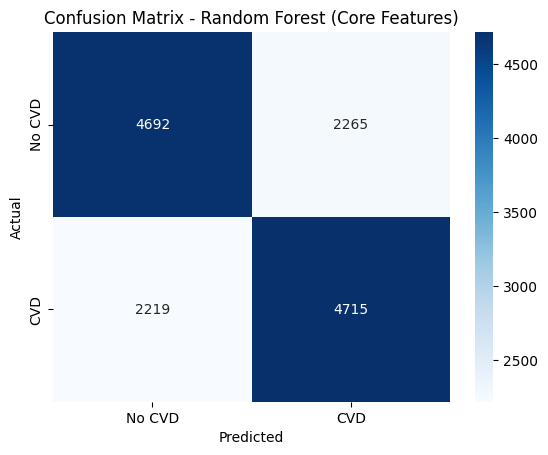

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No CVD", "CVD"], yticklabels=["No CVD", "CVD"])
plt.title("Confusion Matrix - Random Forest (Core Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### So the model is right about 2 out of 3 people (~68%), but it sometimes says “healthy” when someone is actually sick (false negative), which is risky in medicine.

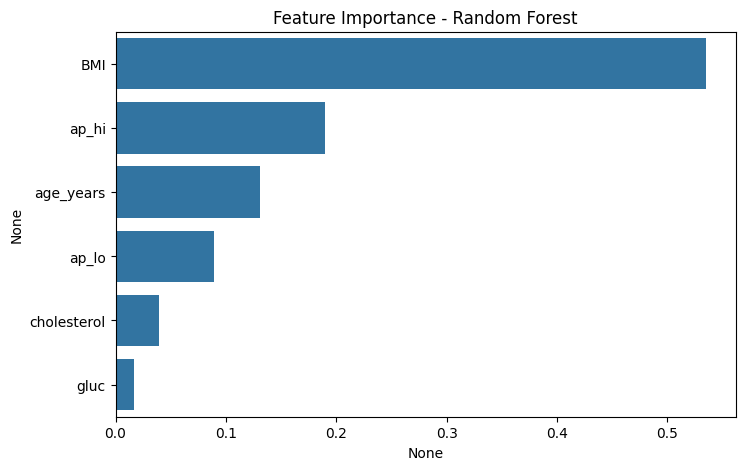

In [50]:
# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=core_features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()

Accuracy (Extended Features): 0.692678712835649

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69      6957
         1.0       0.69      0.71      0.70      6934

    accuracy                           0.69     13891
   macro avg       0.69      0.69      0.69     13891
weighted avg       0.69      0.69      0.69     13891



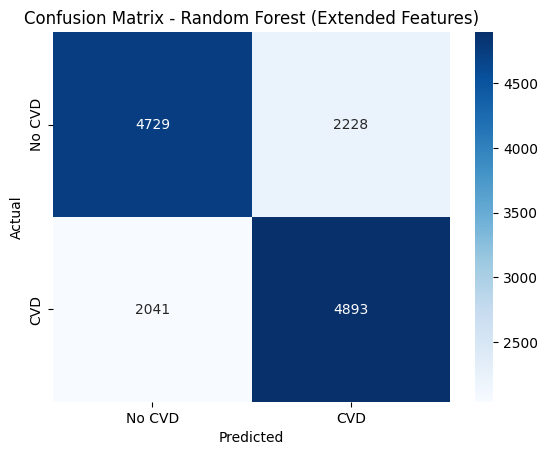

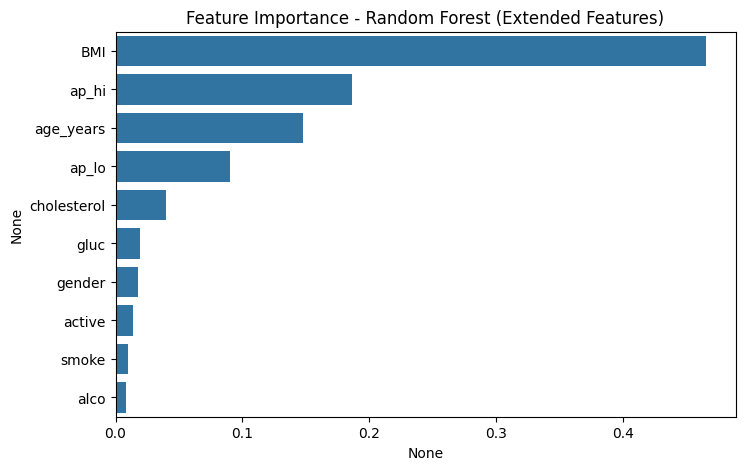

In [51]:
# Extended feature set
extended_features = ['ap_hi', 'ap_lo', 'age_years', 'cholesterol', 'BMI', 'gluc',
                     'smoke', 'alco', 'active', 'gender']

# Train-test split
X_ext = df_scaled[extended_features]
y = df_scaled['cardio']

X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_ext, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest on extended features
rf_ext = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_ext.fit(X_train_ext, y_train_ext)

# Predictions
y_pred_ext = rf_ext.predict(X_test_ext)

# Evaluation
print("Accuracy (Extended Features):", accuracy_score(y_test_ext, y_pred_ext))
print("\nClassification Report:\n", classification_report(y_test_ext, y_pred_ext))

# Confusion Matrix
cm_ext = confusion_matrix(y_test_ext, y_pred_ext)
sns.heatmap(cm_ext, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No CVD", "CVD"], yticklabels=["No CVD", "CVD"])
plt.title("Confusion Matrix - Random Forest (Extended Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances_ext = pd.Series(rf_ext.feature_importances_, index=extended_features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances_ext, y=importances_ext.index)
plt.title("Feature Importance - Random Forest (Extended Features)")
plt.show()


### Lets tune and see 

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_better = RandomForestClassifier(
    n_estimators=500,
    max_depth=14,
    min_samples_split=6,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf_better.fit(X_train_ext, y_train_ext)


,n_estimators,500
,criterion,'gini'
,max_depth,14
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
# Predictions (class labels)
y_pred_better = rf_better.predict(X_test_ext)

# Predicted probabilities for the positive class (CVD = 1)
y_proba_better = rf_better.predict_proba(X_test_ext)[:, 1]


In [55]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test_ext, y_pred_better))
print("\nClassification Report:\n", classification_report(y_test_ext, y_pred_better))


Accuracy: 0.7408393924123533

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.77      0.75      6957
         1.0       0.76      0.71      0.73      6934

    accuracy                           0.74     13891
   macro avg       0.74      0.74      0.74     13891
weighted avg       0.74      0.74      0.74     13891



Lets add another tuning

In [56]:
rf_better2 = RandomForestClassifier(
    n_estimators=1000,         # more trees for stability
    max_depth=16,              # slightly deeper trees
    min_samples_split=4,       # allow finer splits
    min_samples_leaf=2,        # smaller leaf, more detailed patterns
    max_features=0.5,          # use half the features at each split
    max_samples=0.8,           # bootstrap 80% of rows per tree
    class_weight={0:1, 1:1.2}, # give a little extra weight to CVD class
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_better2.fit(X_train_ext, y_train_ext)
y_pred_better2 = rf_better2.predict(X_test_ext)


In [57]:
# Probabilities for ROC/threshold tuning
y_proba_better2 = rf_better2.predict_proba(X_test_ext)[:, 1]

# Basic metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("Accuracy:", accuracy_score(y_test_ext, y_pred_better2))
print("ROC-AUC:", roc_auc_score(y_test_ext, y_proba_better2))
print("\nClassification Report:\n", classification_report(y_test_ext, y_pred_better2))


Accuracy: 0.7373119285868548
ROC-AUC: 0.8045243953762864

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      6957
         1.0       0.74      0.73      0.74      6934

    accuracy                           0.74     13891
   macro avg       0.74      0.74      0.74     13891
weighted avg       0.74      0.74      0.74     13891

